In [ ]:
from typing import List, Dict, TypedDict, Any, Union
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    """
    Represents the state of the agent in the state graph.
    """
    name: str
    age: str
    skills: List[str]
    final: str

In [13]:
def get_name_node(state: AgentState) -> AgentState:
    """
    Returns the state of the agent with the name node.
    """
    state['final'] = f"Hi, {state['name']}."
    return state

In [14]:
def get_age_node(state: AgentState) -> AgentState:
    """
    Returns the state of the agent with the age node.
    """
    state['final'] = f"{state['final']} You are {state['age']} years old."
    return state

In [15]:
def get_skills_node(state: AgentState) -> AgentState:
    """
    Returns the state of the agent with the skills node.
    """
    if state['skills']:
        skills_str = ', '.join(state['skills'])
        state['final'] = f"{state['final']} You have skills in {skills_str}."
    else:
        state['final'] = f"{state['final']} You have no skills listed."
    return state

In [16]:
g = StateGraph(AgentState)

g.add_node("get_name", get_name_node)
g.add_node("get_age", get_age_node)
g.add_node("get_skills", get_skills_node)

g.set_entry_point("get_name")
g.add_edge("get_name", "get_age")
g.add_edge("get_age", "get_skills")
g.set_finish_point("get_skills")

app = g.compile()

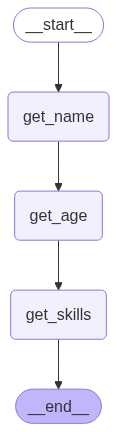

In [17]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
result = app.invoke(
    {
        "name": "Bharat",
        "age": "27",
        "skills": ["Python", "Generative AI", "LangGraph"]
    }
)

In [19]:
result

{'name': 'Bharat',
 'age': '27',
 'skills': ['Python', 'Generative AI', 'LangGraph'],
 'final': 'Hi, Bharat. You are 27 years old. You have skills in Python, Generative AI, LangGraph.'}